<font size=4 color='blue'>

# Clase 3, octubre 7 del 2020


<font size=4 color='blue'>
    
## Generación de las muestras



<font size=5 color='b'>

1.  Se genera un conjunto de numeros aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$)

In [1]:
#Se modelan un conjunto de datos (muestras)
#En una versión futura del código, estos serán sustituidos por datos 
#medidos experimentalmente, y simplemente serán leidos.

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

def generador_datos_simple(beta, m, desviacion):
    
    np.random.seed(3)
    x = np.random.random(m) * 10           # x es arreglo con m numeros aleatorios entre 0 y 100
    e = np.random.randn(m) * desviacion    # e es un error generado aleatoriamente
    y = x * beta + e                       # se obtienen los valores de y 
                                           # x*beta es el valor real, sumando los errores, e, se alejan los puntos de la recta.
        
    return x.reshape((m,1)), y.reshape((m,1))

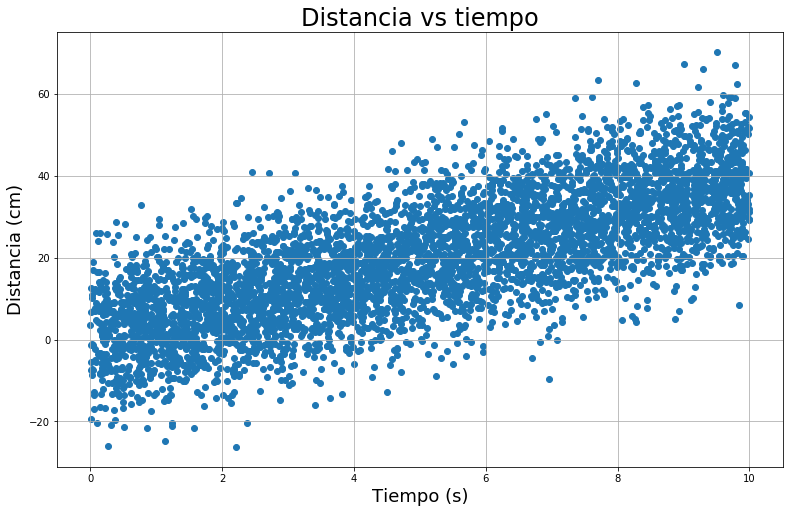

In [2]:
desviacion = 10
beta = 4
m = 5000

x, y = generador_datos_simple(beta, m, desviacion)
plt.figure(figsize=(13,8))
plt.scatter(x, y)
plt.grid(True)
plt.title('Distancia vs tiempo', size=24)
plt.xlabel('Tiempo (s)', size=18)
plt.ylabel('Distancia (cm)', size=18);

<font size=4 color ='blue'>
Se generan histogramas de los datos originales, tanto de (x) como de (y)

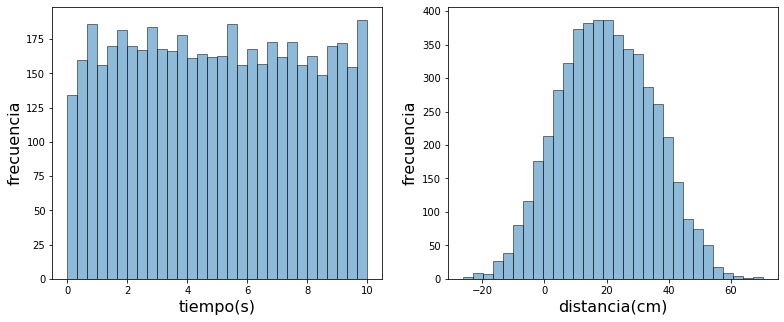

In [3]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('tiempo(s)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('distancia(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

<font size=2, color='blue'>
    
# Buscando la correlación entre las muestras:



<font size=4>

Se tiene un conjunto de muestras (puntos) $(x_i, y_i)$, y se busca encontrar una función F que describa una posible correlación entre ellos. En una primera aproximación que x (en el presente caso el tiempo) es una variable independiente, mientras que y (la distancia en el presente caso) depende de x.

Para encontrar la correlación entre las muestras, proponemos un conjunto de funciones definidas mediante la siguiente relación lineal:

$$ F(x, w, b) = b + w x $$
  
Vemos que esta relación funcional es derivable respecto a todas sus variables, x, w, b.
La letra w se emplea como abreviación de la palabra en ingles "weight", porque se relaciona con la importancia que tiene la variable x en el valor de la función $F$. La letra b es la abreviación de la palabra "bias" en ingles, y se refiere a la referencia respecto a cero de la función $F$.


<font size = 4>

Para encontrar la función que describe la correlación entre los puntos, es necesario generar una métrica para describir qué tanto se acerca cada una de las funciones específicas (con valores definidos de w y de b) a esta descripción.

La métrica que se propone es la siguiente: $$ $$

Para cada muestra $(x_i, y_i)$ se evalua $F(x_i,w,b)$ y se compara con el correspondiente valor $y_i$, la diferencia entre estos valores se eleva al cuadrado. $$ (F(x_i,w,b)-y_i)^{2}$$


Finalmente se calcula el promedio de este valor sobre todas las muestras, el cual definimos como error cuadrático medio (MSE, por sus siglas en inglés, mean squared error). 
Si m es el número de muestras, el MSE queda como:

$$MSE = 1/m∑_{i=1}^{m}(F(x_i,w,b)-y_i)^{2} $$

<font size=4, color='blue'>
    
En el siguiente código se implementa la generación del error cuadrático medio dada una función específica definida por los pesos iniciales w = weight_0, y b = bias_0.

<font size =4>
    

Los parámetros *w* y *b* se eligen al azar: 

``` python 

weight_0 = random.random()*10  # It generates a random float number between 0.0 and 1.0
 
bias_0 = random.random()*10    # It generates a random float number between  0.0 and 1.0

```

In [4]:
import random

#random.seed(10)

#Initializing the variables of the function f

weight_0 = np.random.random()*10
bias_0 = np.random.random()*10

print(weight_0, bias_0)

4.304134937099082 2.9463510538611715


<font size=4 color="blue">

Se grafica la correspondiente función $F(X,w,b)$, junto con los puntos que representan a las muestras

residuo: 122.45416776818853


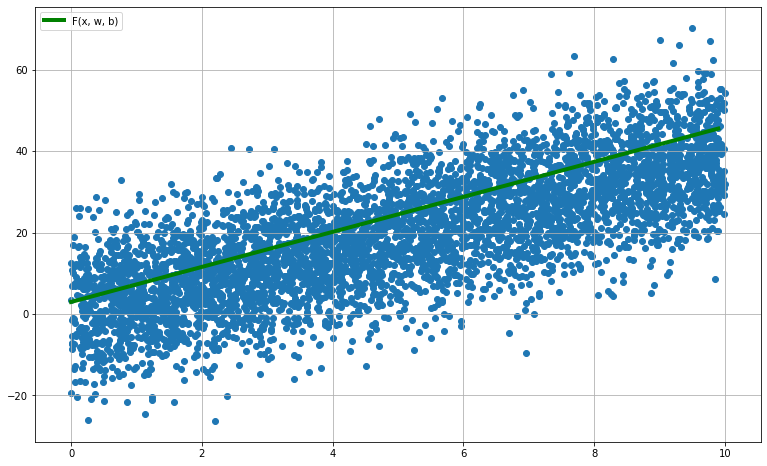

In [5]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(0.0, 10.0, 0.1)
y_ = weight_0*x_ + bias_0


# Using this function F, the residuos is calculated by comparin the calculated and measured values

residuo = 0

for i in range(len(x)):
    r = (y[i]-weight_0*x[i] - bias_0)**2
    residuo += np.squeeze(r)
residuo = residuo/len(x)

print('residuo:', residuo)


#Samples and function F are plotted
plt.figure(figsize=(13,8))
plt.grid(True)
#Plotting function
plt.plot(x_, y_, color='green', lw=4, label='F(x, w, b)')
plt.legend()

#Plotting samples
plt.scatter(x, y);

<font size=5, color='blue'>
Se varian los valores de los parámetros w y b buscando reducir el residuo.

<font size=5, color='blue'>

Se emplea el método de gradiente descendente para realizar esta variación.

<font size=4 color='black'>
    
Los parámetros $\omega$ y $b$ se deben actualizar, de manera que el MSE disminuya. 

Los parámetros se actualizan usando la siguientes ecuaciones:

$$ \omega := \omega - \alpha \dfrac{\partial MSE(\omega, b)}{\partial \omega}$$

$$ b := b - \alpha \dfrac{\partial MSE(\omega, b)}{\partial b}$$

$\alpha$: tasa de aprendizaje, es un hiperparámetro del modelo, y controla la velocidad con que el modelo aprenderá a ajustar a los parametros $\omega$ y $b$.


En este caso

$$ MSE = \dfrac{1}{m}∑_{i=1}^{m}(f(x_i) - y_i)^{2} = \dfrac{1}{m}∑_{i=1}^{m}(\omega x_i + b -y_i)^2 $$

Entonces

$$ \dfrac{\partial MSE(\omega, b)}{\partial \omega} = \dfrac{2}{m}∑_{i=1}^{m}[(\omega x_i + b -y_i)(x_i)]$$

$$ \dfrac{\partial MSE(\omega, b)}{\partial b} = \dfrac{2}{m}∑_{i=1}^{m}[(\omega x_i + b -y_i)]$$



In [6]:
x.shape

(5000, 1)

In [7]:
x = np.squeeze(x)
x.shape

(5000,)

In [8]:
#Function to update weight and bias

def update_parameters(x, y, weight, bias, alfa, iteraciones):
    
    # inicializacion de parametros
    
    x = np.squeeze(x)
    y = np.squeeze(y)
    alfa = alfa
    residuo = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(20,8))    
    
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    
    ax1.scatter(x, y)
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    ax1.set_title('Distancia vs tiempo', size=24)
    ax1.set_xlabel('Tiempo', size=18)
    ax1.set_ylabel('Distancia', size=18)

    # Recta generada con los parametros iniciales

    y_ = weight*x + bias
    
    ax1.plot(x, y_, color='green', lw=4)
    
    weights = []
    biases = []
    residuos = []
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo

        for i in range(m):

            r = (y[i]-weight*x[i] - bias)**2

            d_w += 2*(weight*x[i] + bias- y[i])*x[i]
            
            d_b += 2*(weight*x[i]+bias-y[i])

            residuo += r

        residuo /= m

        d_w /= m

        d_b /= m
        
        weights.append(weight)
        biases.append(bias)
        residuos.append(residuo)
        
        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b


        # Recta generada con la actualizacion de los parametros
        
        y_ = weight*x + bias
        
        ax1.plot(x, y_, lw=4 )

        # Grafica de los residuos como funcion de uno de los parametros (el peso)
        
        ax2.scatter(weight, residuo)
        ax2.set_title('MSE vs weight', size=24)
        ax2.set_xlabel('weight', size=18)
        ax2.set_ylabel('MSE', size=18)

        # Grafica de los residuos como funcion de uno de los parametros (el bias)
        
        ax3.scatter(bias, residuo)
        ax3.set_title('MSE vs bias', size=24)
        ax3.set_xlabel('bias', size=18)
        ax3.set_ylabel('MSE', size=18)


    return weights, biases, residuos

In [9]:
x[:10]

array([5.50797903, 7.08147823, 2.90904739, 5.10827605, 8.92946954,
       8.96293089, 1.2558531 , 2.07242878, 0.51467203, 4.40809844])

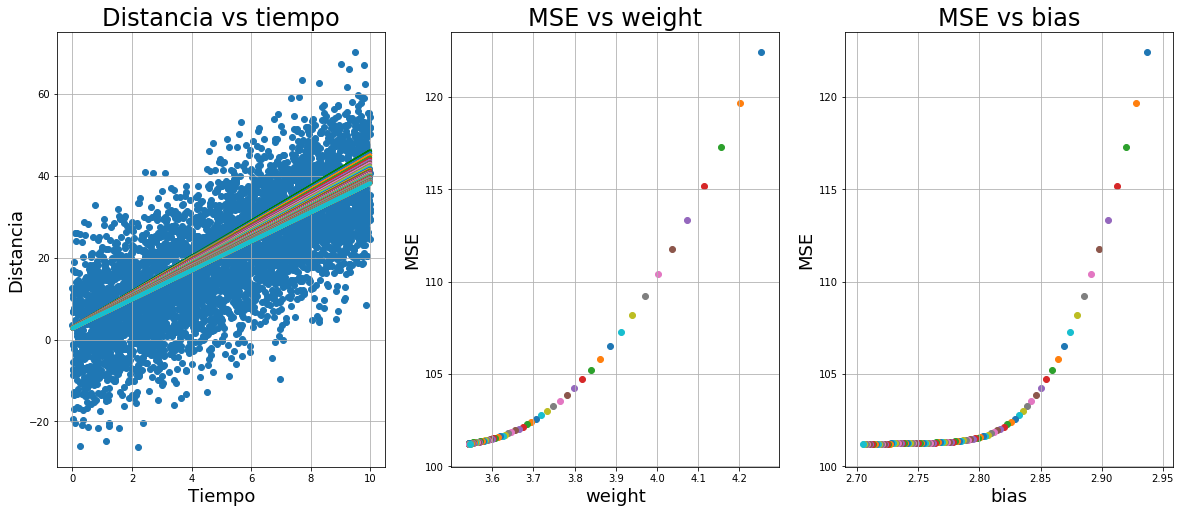

In [10]:
# inicializacion de parametros

weight = weight_0 
bias = bias_0 
alfa = 0.001
num_iter = 100
weights_100, biases_100, residuos_100 = update_parameters(x, y, weight, bias, alfa, num_iter)

<font size=4, color='blue'>
Se grafica el residuo como función de cada iteración en que se modificaron el bias y el peso.

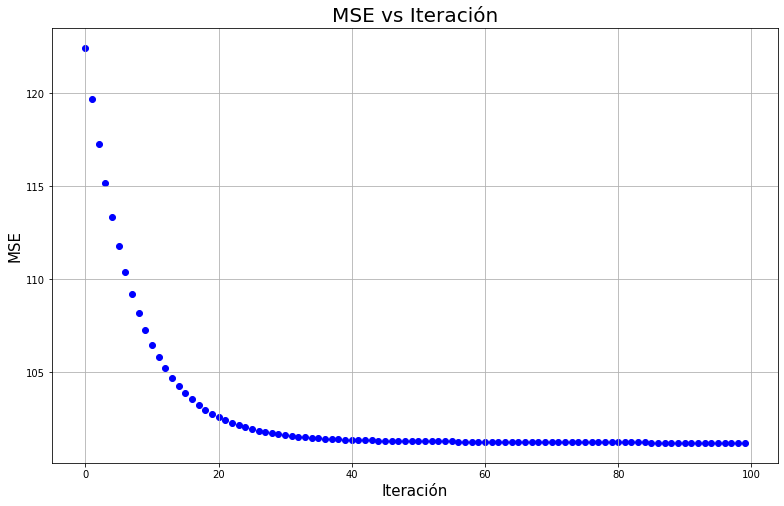

In [11]:
plt.figure(figsize=(13, 8))
plt.grid(True)
plt.scatter(range(num_iter), residuos_100, color='blue')
plt.title('MSE vs Iteración', size=20)
plt.xlabel('Iteración', size=15)
plt.ylabel('MSE', size=15);

<font size=5, color='blue'>

Evaluación del ajuste obtenido


<font size=4, color='blue'>
El total de los datos son divididos en dos grupos: uno con el 90 % de los datos y el segundo con el restante 10 %

<font size=4>
    
La funcion shuffle reordena de forma aleatoria la posición de un conjunto de datos en una lista.

     x = [ 1, 5, 7, 3, 8]
     shuffle(x) = [5, 8, 3, 1, 7]

 La funcion zip permite hacer conjuntos ordenados de datos combinando dos vectores de igual dimensión, por ejemplo

     x = [1, 2, 3]
     y = [5, 6, 7]
    
     zip(x, y) = ((1, 5), (2, 6), (3, 7))
    
 De esta manera, junto con la funcion shuffle, se asegura que los datos correspondientes a x y y intercambian su posición de la misma manera.
 
 Por otra parte, la operación zip(*c)
 
     (x, y) = zip(*c)
     
Separa a los datos x e y, ya mezclados.

5000 5000
4500 4500


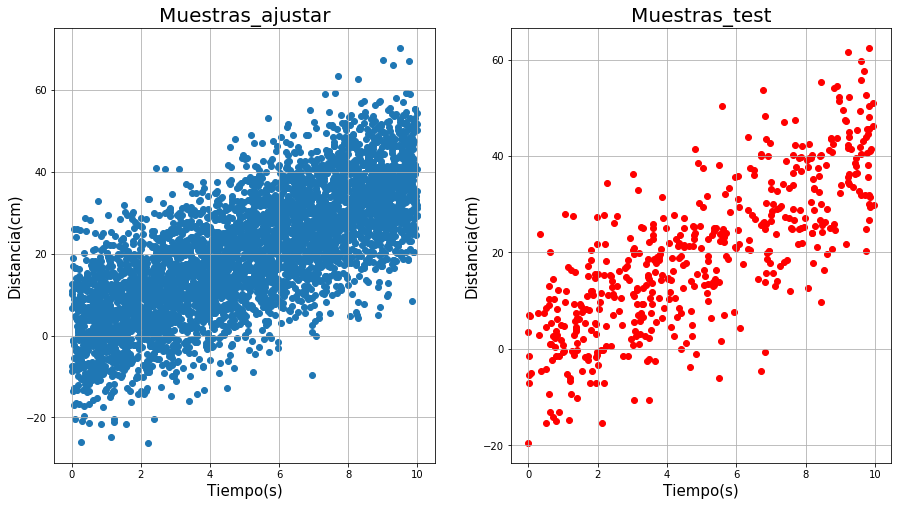

In [12]:
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

print(len(x), len(y))

# Los datos se dividen

muestras_ajustar = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print(len(muestras_ajustar[0]), len(muestras_ajustar[1]))

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(muestras_ajustar[0], muestras_ajustar[1])
plt.title('Muestras_ajustar', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15)
plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(muestras_test[0], muestras_test[1], color='red')
plt.title('Muestras_test', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15);

<font size =4, color = 'blue'>
    
 ## Normalización de las muestras que se emplearan para el ajuste
 

<font size=4 color='b'>
    
 Si se normalizan con 3 veces la desviacion estandar, el 99.7 de los datos tendrán valores entre -1 y 1. El rango con que se normaliza tambien se puede variar entre una desviación o dos desviaciones estandar. En el primer caso el 68 % de los datos tendrán valores entre -1 y 1, mientras que en el segundo caso este rango correspondera al 95 % de los datos.

<font size=5, color='blue'>
Normalizando con una desviación estandar

In [13]:
x_ajustar = muestras_ajustar[0]
y_ajustar = muestras_ajustar[1]

In [14]:
mean_distance = np.mean(y_ajustar)
std_distance = np.std(y_ajustar)

y1 = (y_ajustar-mean_distance)/(1.0*std_distance)

mean_time = np.mean(x_ajustar)
std_time = np.std(x_ajustar)

x1 = (x-mean_time)/(1.0*std_time)

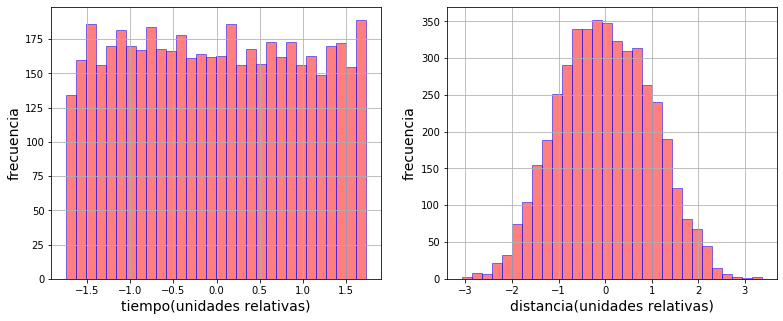

In [15]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x1, bins=30,color='red', edgecolor='b', alpha=0.5)
plt.xlabel('tiempo(unidades relativas)', fontsize=14)
plt.ylabel('frecuencia',fontsize=14)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y1, bins=30,color='red', edgecolor='b', alpha=0.5)
plt.xlabel('distancia(unidades relativas)',fontsize=14)
plt.ylabel('frecuencia',fontsize=14);

<font size=5, color='blue'>
Normalizando con tres desviaciones estandar

In [16]:
mean_distance = np.mean(y_ajustar)
std_distance = np.std(y_ajustar)

y3 = (y-mean_distance)/(3.0*std_distance)

mean_time = np.mean(x_ajustar)
std_time = np.std(x_ajustar)

x3 = (x-mean_time)/(3.0*std_time)

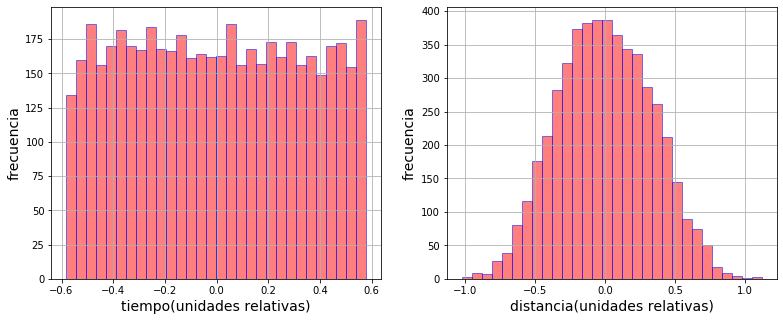

In [17]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x3, bins=30,color='red', edgecolor='b', alpha=0.5)
plt.xlabel('tiempo(unidades relativas)',fontsize=14)
plt.ylabel('frecuencia',fontsize=14)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y3, bins=30,color='red', edgecolor='b', alpha=0.5)
plt.xlabel('distancia(unidades relativas)',fontsize=14)
plt.ylabel('frecuencia',fontsize=14);

<font size=5, color='blue'>
Normalizando con dos desviaciones estandar

In [18]:
mean_distance = np.mean(y_ajustar)
std_distance = np.std(y_ajustar)

y2 = (y-mean_distance)/(2.0*std_distance)

mean_time = np.mean(x_ajustar)
std_time = np.std(x_ajustar)

x2 = (x-mean_time)/(2.0*std_time)

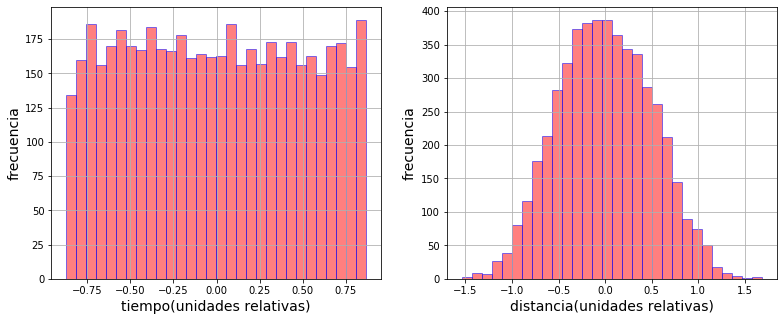

In [19]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x2,bins=30, color='red', edgecolor='b', alpha=0.5)
plt.xlabel('tiempo(unidades relativas)', fontsize=14)
plt.ylabel('frecuencia',fontsize=14)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y2, bins=30,color='red', edgecolor='b', alpha=0.5)
plt.xlabel('distancia(unidades relativas)',fontsize=14)
plt.ylabel('frecuencia',fontsize=14);

<font size=5, color='blue'>
Trabajaremos entonces normalizando los datos con una desviación estandar

In [20]:
mean_distance = np.mean(y_ajustar)
std_distance = np.std(y_ajustar)

y_ajustar = (y_ajustar-mean_distance)/std_distance

mean_time = np.mean(x_ajustar)
std_time = np.std(x_ajustar)

x_ajustar = (x_ajustar-mean_time)/std_time

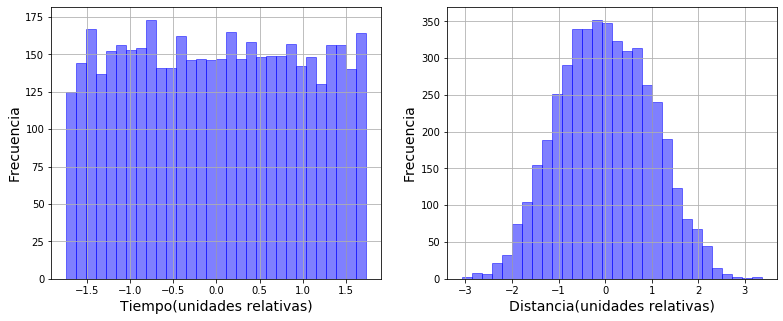

In [21]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x_ajustar, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Tiempo(unidades relativas)', fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y_ajustar, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Distancia(unidades relativas)',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14);

<font size=4, color='blue'>
Se vuelve a correr el ajuste de datos empleando el metodo de gradiente descendente, pero usando sólo el conjunto de datos correspondiente al 90 %

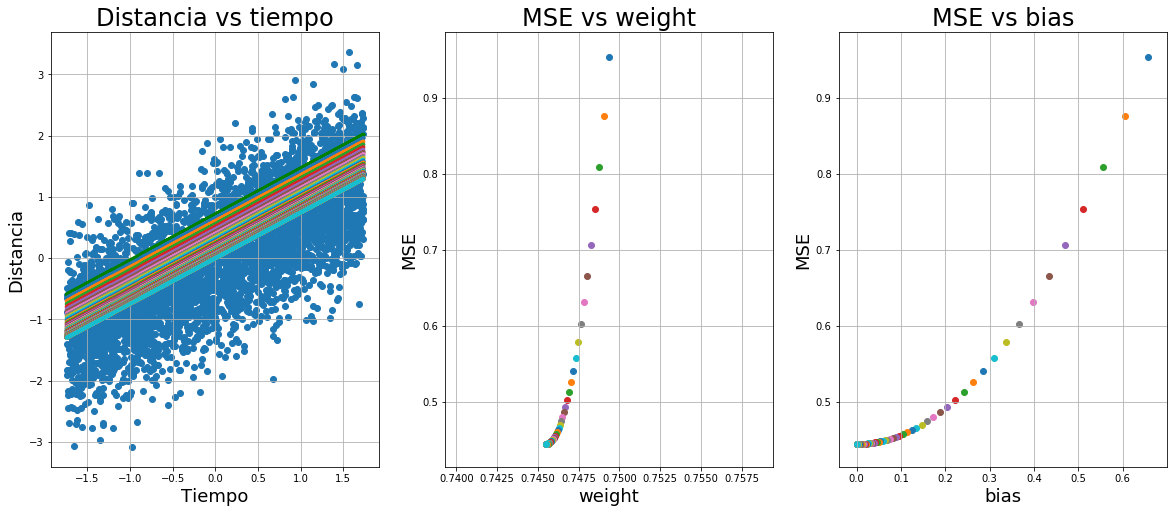

In [22]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.04
num_iter = 100
weights, biases, residuos = update_parameters(x_ajustar, y_ajustar, weight_0, bias_0, alfa, num_iter)

<font size=4, color='blue'>
Graficar el error cuadrático medio obtenido como función del número paso

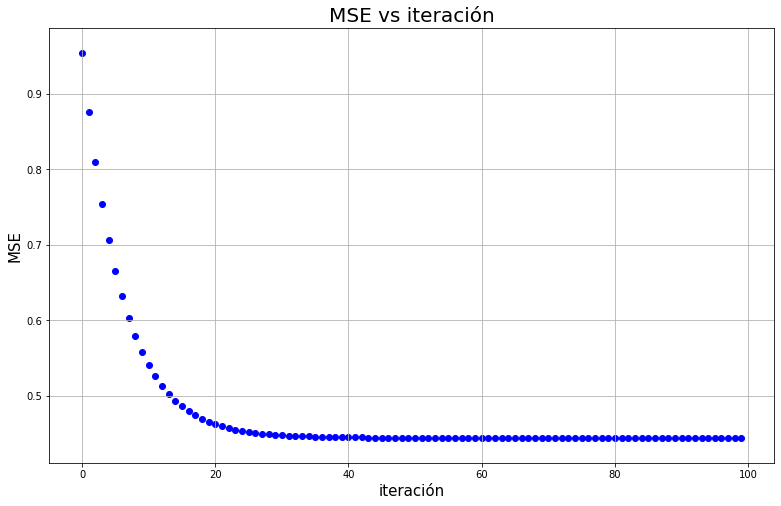

In [23]:
plt.figure(figsize=(13, 8))
plt.grid(True)
plt.scatter(range(num_iter), residuos, color='blue')
plt.title('MSE vs iteración', size=20)
plt.xlabel('iteración', size=15)
plt.ylabel('MSE', size=15);

In [24]:
def residuo(x, y, weight, bias):
    
    r = 0
    m = len(x)

    for i in range(m):
        r = (y[i]-weight*x[i] - bias)**2
        r += np.squeeze(r)
    r /= m
    
    return r

In [25]:
print("Residuo mas pequeño que se obtuvo durante el ajuste=  %.5f" \
      %np.squeeze(residuo(x_ajustar, y_ajustar, weights[-1], biases[-1])))


Residuo mas pequeño que se obtuvo durante el ajuste=  0.00020


<font size=4, color='blue'>
Con los valores optimos del bias y el peso se calcula el error cuadrático medio que se obtiene con el 10 % de los datos restantes.

<font size=4, color='black'>

Para calcular el residuo asociado a las muestras_test, estas se normalizan con los parámetros (valore medio y desviación estandard) utilizados para normalizar los datos de las muestras_ajustar.

In [26]:
y_test = (muestras_test[1]-mean_distance)/std_distance

x_test = (muestras_test[0]-mean_time)/std_time

<font size=4, color='blue'>

Con los valores óptimos obtenidos para el peso y el bias, evaluamos ahora el residuo que se obtiene las muestras_test.

In [27]:
print("Residuo =  %.5f" %np.squeeze(residuo(x_test, y_test, weights[-1], biases[-1])))

Residuo =  0.00118


<font size=5, color='blue'>

Otra forma de evaluar el ajuste obtenido.

<font size=4, color='blue'>
   
En este caso, las muestras seleccionadas para hacer el ajuste se dividen en dos grupos:

El 90 % (este valor es solo un ejemplo) de ellos se emplea para hacer el ajuste,
    
el 10 % restantes se emplean para evaluar el residuo que se obtiene en cada iteración del ajuste.


<font size=4, color='black'>

Modificamos la función que se tiene para actualizar el peso y se bias en cada ciclo.

A esta nueva función se le proporciona la proporción de los datos que se van a emplear para validar el ajuste.

In [28]:
#Function to update weight and bias

def update_parameters_1(x, y, weight, bias, alfa, iteraciones, val_ratio=0.1):
    
    # inicializacion de parametros
    
    x = np.squeeze(x)
    y = np.squeeze(y)
    alfa = alfa
    residuo = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(13,8)) 
    plt.title('MSE vs iteracion', size=24)
    plt.xlabel('iteracion', size=18)
    plt.ylabel('MSE', size=18)
    
    ajustar_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_ajustar = (x[0:ajustar_ratio], y[0:ajustar_ratio])
    samples_val = (x[ajustar_ratio:], y[ajustar_ratio:])
    x = samples_ajustar[0]
    y = samples_ajustar[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
       
    weights = []
    biases = []
    residuos = []
    residuos_val = []
    
    m_ajustar = len(x)
    m_val = len(x_val)
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo
        residuo = 0.0
        residuo_val = 0.0
        
        for j in range(m_ajustar):

            r = (y[j]-weight*x[j] - bias)**2

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            
            d_b += 2*(weight*x[j]+bias-y[j])

            residuo += r

        residuo /= m_ajustar

        d_w /= m_ajustar

        d_b /= m_ajustar
        
        #calculo del residuo de las muestras de valoración
        
        for j in range(m_val):

            r = (y_val[j]-weight*x_val[j] - bias)**2

            #r += np.squeeze(r)
            residuo_val += r

        residuo_val /= m_val
                      
        weights.append(weight)
        biases.append(bias)
        residuos.append(residuo)
        residuos_val.append(residuo_val)
        
        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b
        plt.grid(True)
        
        plt.scatter(i, residuo, color='blue', label='residuo')
        
        plt.scatter(i, residuo_val, color='orange', label='residuo_val')

    return weights, biases, residuos, residuos_val

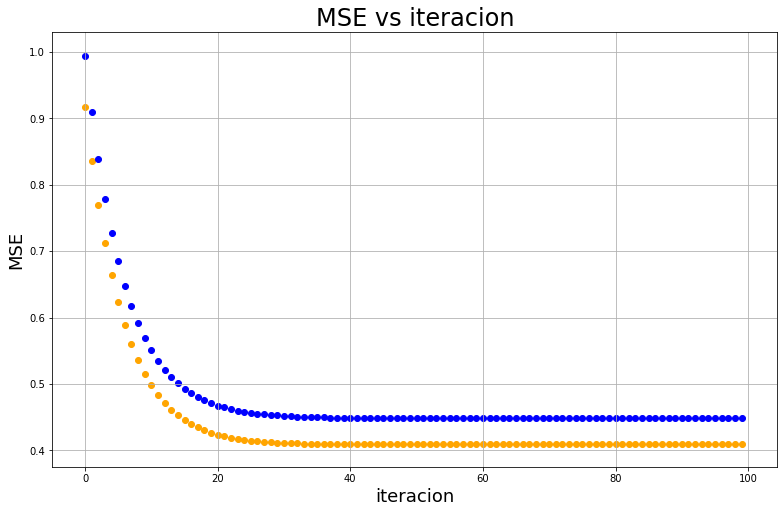

In [29]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.04
num_iter = 100
validacion_ratio = 0.1

weights, biases, residuos, residuos_val = update_parameters_1 \
        (x_ajustar, y_ajustar, weight_0, bias_0, alfa, num_iter, validacion_ratio)


<font size=4, color='blue'>

Con los valores óptimos obtenidos para el peso y el bias, evaluamos ahora el residuo que se obtiene las muestras_test.

In [30]:
print("Residuo =  %.5f" %np.squeeze(residuo(x_test, y_test, weights[-1], biases[-1])))


Residuo =  0.00118


<font size=5, color='blue'>

Inferencia

<font size=4, color='black'>

Dado el tiempo t podemos obtener una predicción (inferencia) del valor de la distancia.

In [31]:
def inference(t, w, b, mean_t, std_t, mean_y, std_y) :
    t = (t-mean_t) / std_t 
    d = w * t + b
    d = d * std_y + mean_y
    
    return d

In [32]:
tiempos = [1.65, 2.20, 4.5, 8.7]

for t in tiempos :
    distance = inference(t,weights[-1], biases[-1], mean_time, std_time, mean_distance, std_distance)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distance))

Para el tiempo de 1.650 s la distancia inferida es  6.737 cm 
Para el tiempo de 2.200 s la distancia inferida es  8.880 cm 
Para el tiempo de 4.500 s la distancia inferida es 17.838 cm 
Para el tiempo de 8.700 s la distancia inferida es 34.196 cm 


<font size=4 color='black'>

Vemos entonces que con el ajuste de una función al conjunto de puntos $(x_i, y_i)$ podemos hacer predicciones de valores y dado el valor de x. 
    
Es decir, el sistema desarrollado "aprendió" la correlación que hay entre las $x_i$ y la $y_i$, y por ello puede hacer inferencias.

<font size=6 color='blue'>

Inteligencia Artificial

<font size=5 color='blue'>

Pasaremos conceptualmente del ajuste de datos a la Inteligencia Artificial

<font size=4 color='black'>

Esta transición la haremos empleando toda la matematica desarrollada en las celdas anteriores

<font size=4 color='black'>
    
En inteligencia artificial, un sistema es inteligente cuando después de ser entrenado con información que le es suministrada, es capaz de hacer inferencias.



<font size=5 color='blue'>
 
Dada la dinámica en inteligencia artificial a nivel mundial, en el presente curso,
    
emplearemos la nomenclatura estandar que se emplea en el idioma Inglés.

<font size=4 color='black'>

Al analizar una area de estudio, se deben encontrar las conceptos que la identifican.
    
Se hace una cuantificación de estos conceptos definiendo variables que identifican a cada uno de ellos.
    
Existe un conjunto que estas variables $\textbf{X}$ que son idependientes y que determinan al resto, a las cuales denominaremos como $\textbf {Y}$.
    



<font size=4 color='black'>

Se obtiene un cojunto m de muestras de estas variables.

Se genera un sistema de aprendizaje, al cual se le suministran estas muestras.

Con esta información el sistema aprende y puede hacer inferencias.

Por ejemplo, si se le presenta un nuevo dato X del área de estudio, el sistema puede predecir (inferir) los correspondientes valores de las variable Y.

<font size=5 color='blue'>
    
El ejemplo que vimos de ajuste de una función a un conjunto de puntos $(x_i, y_i)$ lo traduciremos a un sistema de aprendizaje artificial.

<font size=4 color='black'>
    
El área que analizamos corresponde al movimiento de un cuerpo. 
    
Esta área la caracterizamos por los conceptos tiempo y distancia. 
    
Definimos la viable $x$ para identificar al tiempo y la variable $y$ para idenficar la distancia.

<font size=5 color='blue'>

Analizaremos un ejemplo de esta área.

<font size=4 color='black'>

Tenemos un cuerpo, del cual se han obtenido $m$ muestras de estas variables. Cada muestra de este cuerpo la identificamos por la dupla $(x_i, y_i)$.
    
Generaremos un sistema de aprendizaje, en donde proponemos que la función $F(x)$ describe la relación entre estas variables. 
    
Esta función puede tener diferentes formas. Por ejemplo:
    
$$F(x, w, b) = b + w x$$
    
o bien:
    
$$ F(x,w,b) = 1.7159*tanh(weight*x+bias) $$
    
o bien:
    
$$ F(x,weights, biases) = Artificial-Neural-Network (ANN)$$
    
o bien:
    
$$ F(x,weights, biases) = Supported-Vector-Machine(SVM)$$
    
o bien: 
    
$$ F(x,weight, biases) = Decision-Tree $$
    
o bien:
    
$$ F(x,weight, biases) = Decision-Forest $$
    
entre otros.   

<font size=4 color='black'>

Dada la simplicidad de nuestros datos, para nuestro sistema de aprendizaje proponemos que la relación entre las vairables que describen nuestro sistema es una relación lineal, descrita por la función:
    
 $$F(x, w, b) = b + w x$$
    
En la nomenclatura de inteligencia artificial, esto significa que nuestro problema se resuelve con una "regresión lineal" (Linear regression).

<font size=5 color='blue'>

Estos son los datos que describen el movimiento de nuestro cuerpo

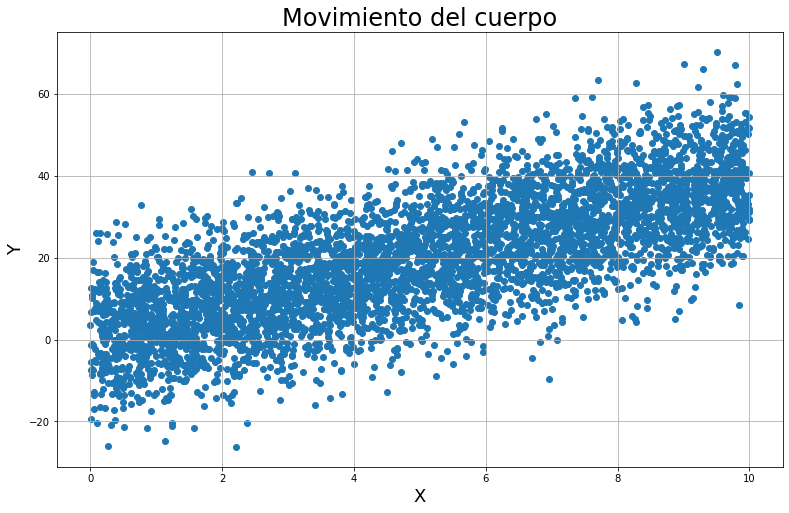

In [33]:
desviacion = 10
beta = 4
m = 5000

x, y = generador_datos_simple(beta, m, desviacion)
plt.figure(figsize=(13,8))

plt.scatter(x, y)
plt.grid(True)
plt.title('Movimiento del cuerpo', size=24)
plt.xlabel('X', size=18)
plt.ylabel('Y', size=18);

<font size=4 color ='blue'>
Se generan histogramas de los las variables $x$ y $y$

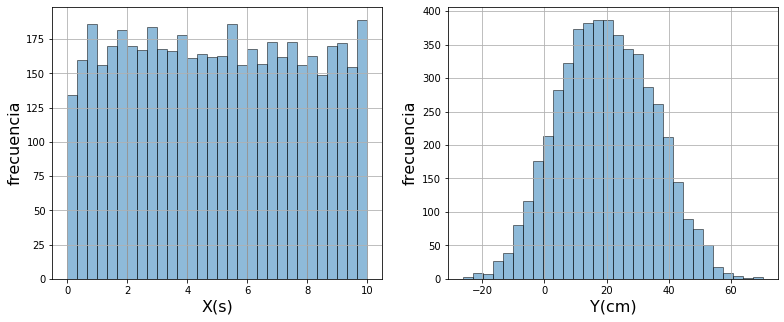

In [34]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('X(s)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Y(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

<font size=4, color='blue'>
El total de los datos son divididos en dos grupos: uno con el 90 % de los datos y el segundo con el restante 10 %

5000 5000
4500 4500


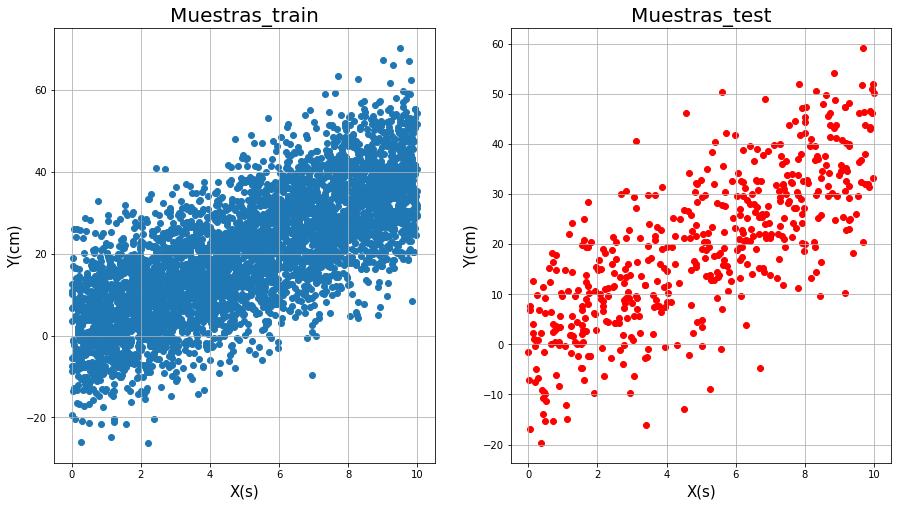

In [35]:
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

print(len(x), len(y))

# Los datos se dividen

muestras_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print(len(muestras_train[0]), len(muestras_train[1]))

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(muestras_train[0], muestras_train[1])
plt.title('Muestras_train', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15)
plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(muestras_test[0], muestras_test[1], color='red')
plt.title('Muestras_test', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15);

<font size=5, color='blue'>
Para las muestras de entrenamiento, las variables se normalizan empleando el promedio y la desviación estandar de la variable.

In [36]:
x_train = muestras_train[0]
y_train = muestras_train[1]

In [37]:
y_mean = np.mean(y_train)
y_std = np.std(y_train)

y_train = (y_train-y_mean)/y_std

x_mean = np.mean(x_train)
x_std = np.std(x_train)

x_train = (x_train-x_mean)/x_std

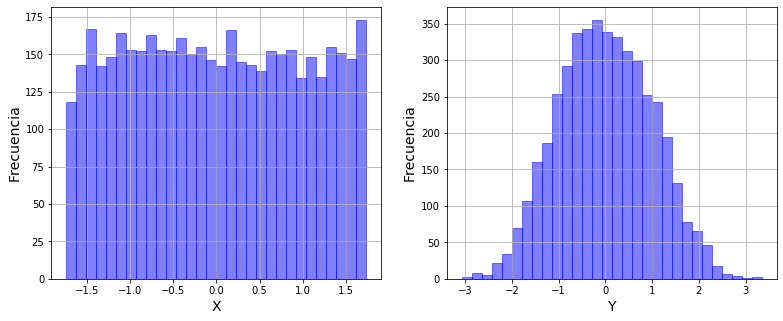

In [38]:
plt.figure(figsize=(13,5))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.hist(x_train, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('X', fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.hist(y_train, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Y',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14);

<font size=4, color='blue'>
   
Las muestras seleccionadas para hacer el entrenamiento se dividen en dos grupos:

El 90 % (este valor es solo un ejemplo) de ellos se emplea para hacer el entrenamiento,
    
el 10 % restantes se emplean para evaluar el $\textbf {costo}$ que se obtiene en cada $\textbf {época}$ del ajuste.


<font size=4, color='black'>

Generamos la función "training" que contiene la arquitectura que emplearemos para entrenar el sistema aprendizaje. 
    
De momento, en esta función incluiremos también la métrica que emplearemos para obtener el entrenamiento, ejecutaremos el entrenamiento y generaremos las graficas del costo como función de la época. 
    
Estas tres últimas acciones normalmente se definen por separado.
    

In [39]:
#Function to update weight and bias

def training(x_train, y_train, weight, bias, alpha, epochs, val_ratio=0.1):
    
    # inicializacion de parametros
    
    x = np.squeeze(x_train)
    y = np.squeeze(y_train)
    alpha = alfa
    costs = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(13,8)) 
    plt.title('Cost vs epoch', size=24)
    plt.xlabel('epoch', size=18)
    plt.ylabel('Cost', size=18)
    
    train_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_train = (x[0:train_ratio], y[0:train_ratio])
    samples_val = (x[train_ratio:], y[train_ratio:])
    x = samples_train[0]
    y = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
       
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x)
    m_val = len(x_val)
    
    for i in range(epochs):

        # calculo de derivadas y el residuo
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            r = (y[j]-weight*x[j] - bias)**2

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            
            d_b += 2*(weight*x[j]+bias-y[j])

            cost += r

        cost /= m_train

        d_w /= m_train

        d_b /= m_train
        
        #calculo del residuo de las muestras de valoración
        
        for j in range(m_val):

            r = (y_val[j]-weight*x_val[j] - bias)**2

            #r += np.squeeze(r)
            cost_val += r

        cost_val /= m_val
               
       
        weights.append(weight)
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        # Actualizacion de los parametros

        weight = weight - alpha*d_w
        bias = bias - alpha*d_b
        
        plt.grid(True)
        plt.scatter(i, cost, color='blue')
        
        plt.scatter(i, cost_val, color='orange')

    return weights, biases, costs, costs_val

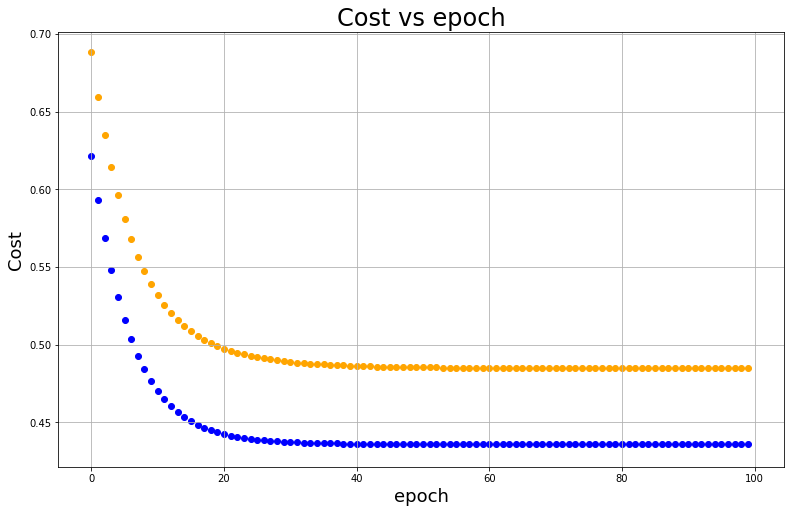

In [40]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alpha = 0.04
num_epochs = 100
validation_ratio = 0.1

weights, biases, cost, cost_val = training \
        (x_train, y_train, weight_0, bias_0, alpha, num_epochs, validation_ratio)


<font size=5, color='blue'>

Inferencia

<font size=4, color='black'>

Dado el tiempo t el sistema de aprendizaje puede predecir (inferir) del valor de la distancia para ese tiempo.

In [41]:
def inference(x, w, b, x_mean, x_std, y_mean, y_std) :
    
    x = (x-x_mean) / x_std 
    y = w * x + b
    y = y * y_std + y_mean
    
    return y

In [42]:
tiempos = [1.65, 2.20, 4.5, 8.7]

for t in tiempos :
    distancia = inference(t,weights[-1], biases[-1], mean_time, std_time, mean_distance, std_distance)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 1.650 s la distancia inferida es  6.848 cm 
Para el tiempo de 2.200 s la distancia inferida es  8.981 cm 
Para el tiempo de 4.500 s la distancia inferida es 17.898 cm 
Para el tiempo de 8.700 s la distancia inferida es 34.183 cm 
